### Heroes Of Pymoli Data Analysis
* Of the 1163 active players, the vast majority are male (84%). There also exists, a smaller, but notable proportion of female players (14%).

* Our peak age demographic falls between 20-24 (44.8%) with secondary groups falling between 15-19 (18.60%) and 25-29 (13.4%).  
-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
data_csv = 'Resources/purchase_data.csv'

# Read Purchasing File and store into Pandas data frame
purchase_df = pd.read_csv('Resources/purchase_data.csv')
purchase_df.head(10)


,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
5,5,Yalae81,22,Male,81,Dreamkiss,3.61
6,6,Itheria73,36,Male,169,"Interrogator, Blood Blade of the Queen",2.18
7,7,Iskjaskst81,20,Male,162,Abyssal Shard,2.67
8,8,Undjask33,22,Male,21,Souleater,1.10
9,9,Chanosian48,35,Other / Non-Disclosed,136,Ghastly Adamantite Protector,3.58


## Player Count

* Display the total number of players


In [27]:
PlayerSum = purchase_df["SN"].drop_duplicates()
PlayerSum = PlayerSum.count()

print(f'The total number of players is {PlayerSum}.')

pd.DataFrame({'Player Total': [PlayerSum]})

The total number of players is 576.


,Player Total
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [28]:
#Run basic calculations to obtain number of unique items, average price, etc.
#unique items
item_count_id = len(purchase_df['Item ID'].unique())
print(f'The total number of unique itemes is: {item_count_id}')


#total sales
total_sales = sum(purchase_df['Price'])

#total items sold
total_sold = len(purchase_df['Item Name'])


#average price
average_price = round(purchase_df['Price'].mean() ,2)


print(f'The average sales price is: {average_price}')
pd.DataFrame({'Number Sold': [total_sold], 'Total Revenue': total_sales, 'Unique Item Count': [item_count_id], 'Average Price': [average_price]})

The total number of unique itemes is: 179
The average sales price is: 3.05


,Number Sold,Total Revenue,Unique Item Count,Average Price
0,780,2379.77,179,3.05


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [29]:

Genders = len(purchase_df ["Gender"].unique())

print(f'Total number of genders claimed in survey are: {Genders}')

Grouped = purchase_df[["SN", "Gender"]]
Grouped = Grouped.drop_duplicates()
Counts = Grouped["Gender"].value_counts()
print(Counts)
Gender_Counts = [Counts[0], Counts[1], Counts[2]]
#print(Gender_Counts)

Male_Count = Counts[0]
print(Male_Count)
Female_Count = Counts[1]
print(Female_Count)
Other_Count = Counts[2]
print(Other_Count)


Male_Percent = round((Male_Count/PlayerSum) * 100, 2)
print(Male_Percent)

Female_Percent = round((Female_Count/PlayerSum) * 100, 2) 
print(Female_Percent)

Other_Percent = round((Other_Count/PlayerSum) * 100, 2)
print(Other_Percent)

gender_dictionary = {
    "Total Count": [Male_Count, Female_Count, Other_Count],
    "Percentage of Players" : [Male_Percent, Female_Percent, Other_Percent]
}
print(gender_dictionary)

gender_df = pd.DataFrame(gender_dictionary, columns = ['Total Count', 'Percentage of Players'],
                        index = ['Male', 'Female', 'Other'])
gender_df



Total number of genders claimed in survey are: 3
Male                     484
Female                    81
Other / Non-Disclosed     11
Name: Gender, dtype: int64
484
81
11
84.03
14.06
1.91
{'Total Count': [484, 81, 11], 'Percentage of Players': [84.03, 14.06, 1.91]}


,Total Count,Percentage of Players
Male,484,84.03
Female,81,14.06
Other,11,1.91


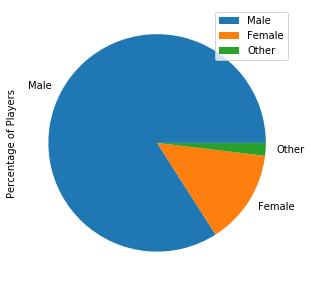

In [54]:
plot = gender_df.plot.pie(y='Percentage of Players', figsize=(5, 5))


## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [30]:

total_sales = sum(purchase_df['Price'])
total_sales = round((total_sales), 2)
print(total_sales)  #double checking myself




2379.77


In [31]:
#gender sales grouping

Gender_Sales_Grouped = purchase_df[["SN", "Gender", "Price"]]
Grouped_Counts = Gender_Sales_Grouped["Gender"].value_counts()
Grouped_Sales = Gender_Sales_Grouped["Price"].sum()
print(Grouped_Counts)
print(Grouped_Sales)

Male_Sales_Count = Grouped_Counts[0]
print(Male_Sales_Count)

Female_Sales_Count = Grouped_Counts[1]
print(Female_Sales_Count)

Other_Sales_Count = Grouped_Counts[2]
print(Other_Sales_Count)

Gender_Sales_Grouped = Gender_Sales_Grouped.groupby('Gender')
#gender_spend = Gender_Sales_Grouped.sum()
gender_spend = purchase_df.groupby('Gender')['Price'].sum()
print(gender_spend)  # price name in printed results is total spent by gender

max_cost_by_gender = purchase_df.groupby('Gender')['Price'].max()
min_cost_by_gender = purchase_df.groupby('Gender')['Price'].min()
avg_cost_by_gender = purchase_df.groupby('Gender')['Price'].mean()
print(max_cost_by_gender)
print(min_cost_by_gender)
print(avg_cost_by_gender)

#male, female and other average spend
MAS = gender_spend.Male / Male_Sales_Count
MAS = round((MAS), 2)
print(MAS)

FAS = gender_spend.Female / Female_Sales_Count
FAS = round((FAS), 2)
print(FAS)

OAS = gender_spend["Other / Non-Disclosed"] / Other_Sales_Count
OAS = round((OAS), 2)
print(OAS)





Male                     652
Female                   113
Other / Non-Disclosed     15
Name: Gender, dtype: int64
2379.77
652
113
15
Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64
Gender
Female                   4.90
Male                     4.99
Other / Non-Disclosed    4.75
Name: Price, dtype: float64
Gender
Female                   1.00
Male                     1.00
Other / Non-Disclosed    1.33
Name: Price, dtype: float64
Gender
Female                   3.203009
Male                     3.017853
Other / Non-Disclosed    3.346000
Name: Price, dtype: float64
3.02
3.2
3.35


In [32]:
#Sum of Sales by Gender
#gender_spend
#total sales by gender
Male_Sum = gender_spend.Male
Male_Sum = round((Male_Sum), 2)
print(Male_Sum)

Female_Sum = gender_spend.Female
Female_Sum = round((Female_Sum), 2)
print(Female_Sum)

Other_Sum = gender_spend["Other / Non-Disclosed"]
Other_Sum = round((Other_Sum), 2)
print(Other_Sum)



1967.64
361.94
50.19


In [33]:
#Percent spent by gender

#male, female and other percent of total sales 
MP = Male_Sum / total_sales
MP = round((MP), 2)
print(MP)

FP = Female_Sum / total_sales
FP = round((FP), 2)
print(FP)

OP = Other_Sum / total_sales
OP = round((OP), 2)
print(OP)



0.83
0.15
0.02


In [34]:
Gender_Spending_List_Dictionary  = {
    "Total Count": [Male_Count, Female_Count, Other_Count],
    "Average Spending by Gender" : [MAS, FAS, OAS],
    "Sum of Sales by Gender" : [Male_Sum, Female_Sum, Other_Sum],
    "Percent of Total Sales/Gender" : [MP, FP, OP]
}
print(Gender_Spending_List_Dictionary)




{'Total Count': [484, 81, 11], 'Average Spending by Gender': [3.02, 3.2, 3.35], 'Sum of Sales by Gender': [1967.64, 361.94, 50.19], 'Percent of Total Sales/Gender': [0.83, 0.15, 0.02]}


In [35]:
Gender_Spending_df = pd.DataFrame(Gender_Spending_List_Dictionary)

Gender_Spending_df






,Total Count,Average Spending by Gender,Sum of Sales by Gender,Percent of Total Sales/Gender
0,484,3.02,1967.64,0.83
1,81,3.20,361.94,0.15
2,11,3.35,50.19,0.02


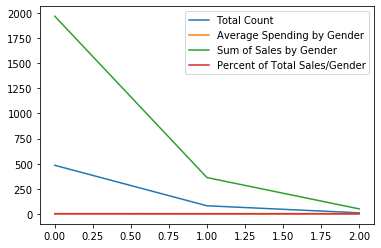

In [48]:
Gender_Spending_df.plot()

## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [36]:
age_bins = [0, 9.90, 14.90, 19.90, 24.90, 29.90, 34.90, 39.90, 99999]
group_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]


purchase_df["Age_Group"] = pd.cut(purchase_df["Age"], age_bins, labels=group_names)
Age_Purchase_df = purchase_df.groupby("Age_Group")
percentage = Age_Purchase_df["SN"].nunique()/(Age_Purchase_df["SN"].nunique()).sum() * 100

percentage

summarytable2 = pd.DataFrame({"Percentage":percentage,"Count by Age":Age_Purchase_df["SN"].nunique()})

summarytable2

,Percentage,Count by Age
Age_Group,,
<10,2.951389,17
10-14,3.819444,22
15-19,18.576389,107
20-24,44.791667,258
25-29,13.368056,77
30-34,9.027778,52
35-39,5.381944,31
40+,2.083333,12


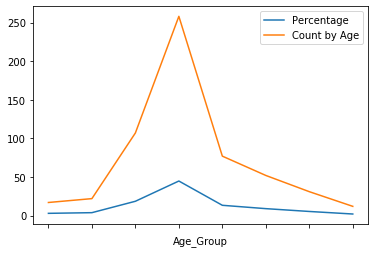

In [55]:
summarytable2.plot()

## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [37]:
purchase_df["Age Group"] = pd.cut(purchase_df["Age"], age_bins, labels=group_names)
Age_Groups = purchase_df.groupby("Age Group")

Age_Counts = purchase_df["Age Group"].value_counts()
Sales_Age_Sum = Age_Groups["Price"].sum()
Average_Sales_Age = Age_Groups["Price"].mean()
#Normalized_Group = Sales_Age_Sum/Age_Counts

Summary = pd.DataFrame({
    "Age Counts": Age_Counts,
    "Sums by Age": Sales_Age_Sum,
    "Average Sales by Age": Average_Sales_Age,
    #"Normalized Purchase Price": Normalized_Group
    
})

Summary.head()

,Age Counts,Sums by Age,Average Sales by Age
<10,23,77.13,3.353478
10-14,28,82.78,2.956429
15-19,136,412.89,3.035956
20-24,365,1114.06,3.052219
25-29,101,293.00,2.900990


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [38]:
Groups_df = purchase_df.groupby(["SN"])
print(Groups_df)

Totals_count = Groups_df["SN"].count()
Total_prices = Groups_df["Price"].sum()
Average_prices = Groups_df["Price"].mean()

Sum_Table = pd.DataFrame({"Totals count": Totals_count,
    "Total prices": Total_prices,
    "Average prices": Average_prices})

Sum_Table = Sum_Table.sort_values(['Total prices'], ascending=False)
Sum_Table.head

<bound method NDFrame.head of              Totals count  Total prices  Average prices
SN                                                     
Lisosia93               5         18.96        3.792000
Idastidru52             4         15.45        3.862500
Chamjask73              3         13.83        4.610000
Iral74                  4         13.62        3.405000
Iskadarya95             3         13.10        4.366667
...                   ...           ...             ...
Ililsasya43             1          1.02        1.020000
Irilis75                1          1.02        1.020000
Aidai61                 1          1.01        1.010000
Chanirra79              1          1.01        1.010000
Alo38                   1          1.00        1.000000

[576 rows x 3 columns]>

## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [39]:
group = purchase_df.groupby(["Item ID"])
print(group)

Item_count = group["Item ID"].count()
Item_name =  group["Price"].sum()
Item_price = Item_count / Item_name

summary_tab = pd.DataFrame({"Item Count": Item_count,
                            "Item Price":Item_price,
                             "Total Price": Item_name })
                          
summary_tab = summary_tab.sort_values(["Item Count"], ascending=False)
summary_tab.head()

,Item Count,Item Price,Total Price
Item ID,,,
92,13,0.216703,59.99
178,12,0.236407,50.76
145,9,0.218341,41.22
132,9,0.310452,28.99
108,9,0.283286,31.77


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [40]:
group = purchase_df.groupby(["Item ID"])
print(group)

Item_name =  group["Price"].sum()
Item_count = group["Item ID"].count()
Item_price = Item_count/Item_name

summary_tab = pd.DataFrame({"Total Price": Item_name,
                            "Item Count": Item_count,
                            "Item Price":Item_price
                              })
                          
summary_tab = summary_tab.sort_values(["Total Price"], ascending=False)
summary_tab.head()

,Total Price,Item Count,Item Price
Item ID,,,
92,59.99,13,0.216703
178,50.76,12,0.236407
82,44.10,9,0.204082
145,41.22,9,0.218341
103,34.80,8,0.229885


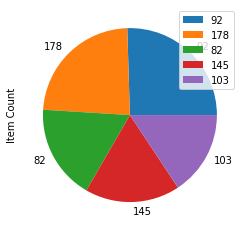

In [64]:
top_5= summary_tab.head()
top_5.plot(kind='pie', y='Item Count')